# Cancer_Mortality_Model

### Problem Statement-
Build a model to predict cancer mortality rates in United states of America

In [14]:
# Important Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
df=pd.read_csv("cancer_mortality.csv")
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898.0,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127.0,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348.0,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243.0,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955.0,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961.0,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609.0,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144.0,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745.0,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [3]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898.0,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127.0,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348.0,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243.0,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955.0,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3046 non-null   float64
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [7]:
df.shape

(3047, 34)

In [9]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [10]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     1
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [12]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3046.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47061.982272,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12041.853935,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38880.250000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45201.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.500000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


<AxesSubplot:>

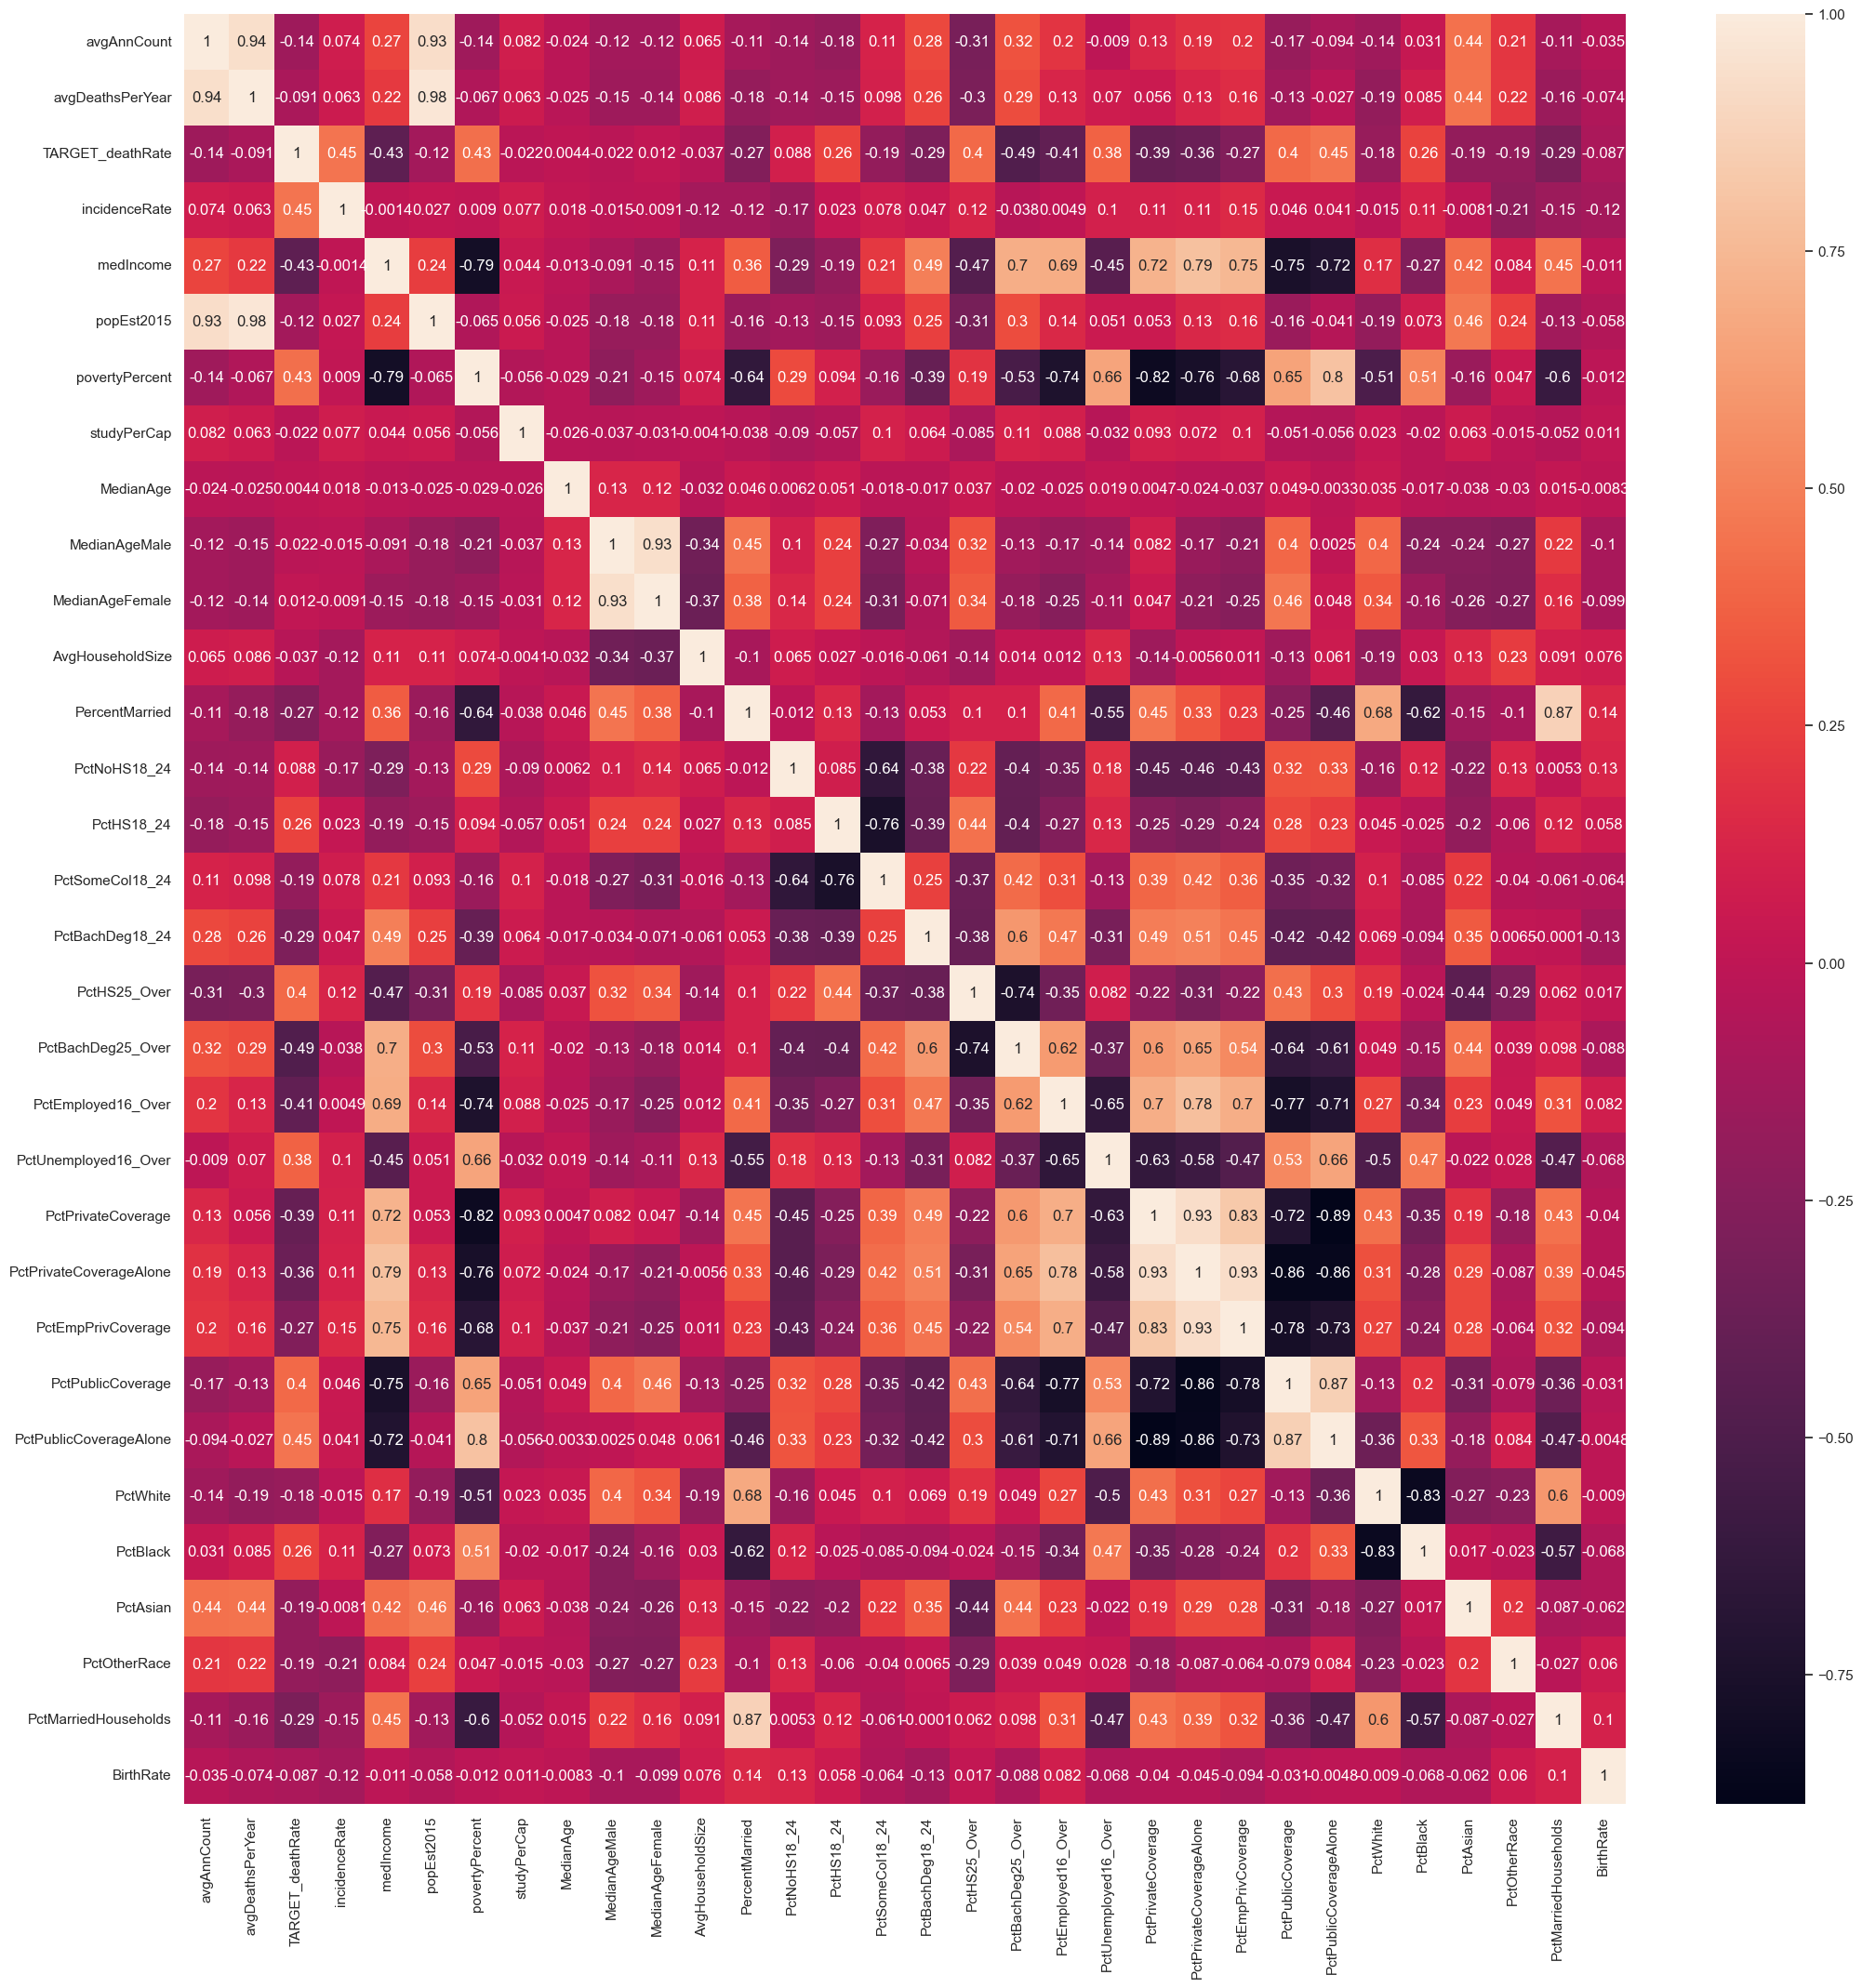

In [22]:
plt.figure(figsize=(25,25))
ax = plt.subplot()
sns.heatmap(df.corr(), annot = True)

In [23]:
Target=df["TARGET_deathRate"]
Target

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [24]:
df.drop(['PctPrivateCoverageAlone','TARGET_deathRate', 'PctSomeCol18_24', 'Geography'], axis=1, inplace=True)
df["TARGET_deathRate"] = Target

In [25]:
df.shape

(3047, 31)

### Univarite Analysis

### A.Histogram Distribution

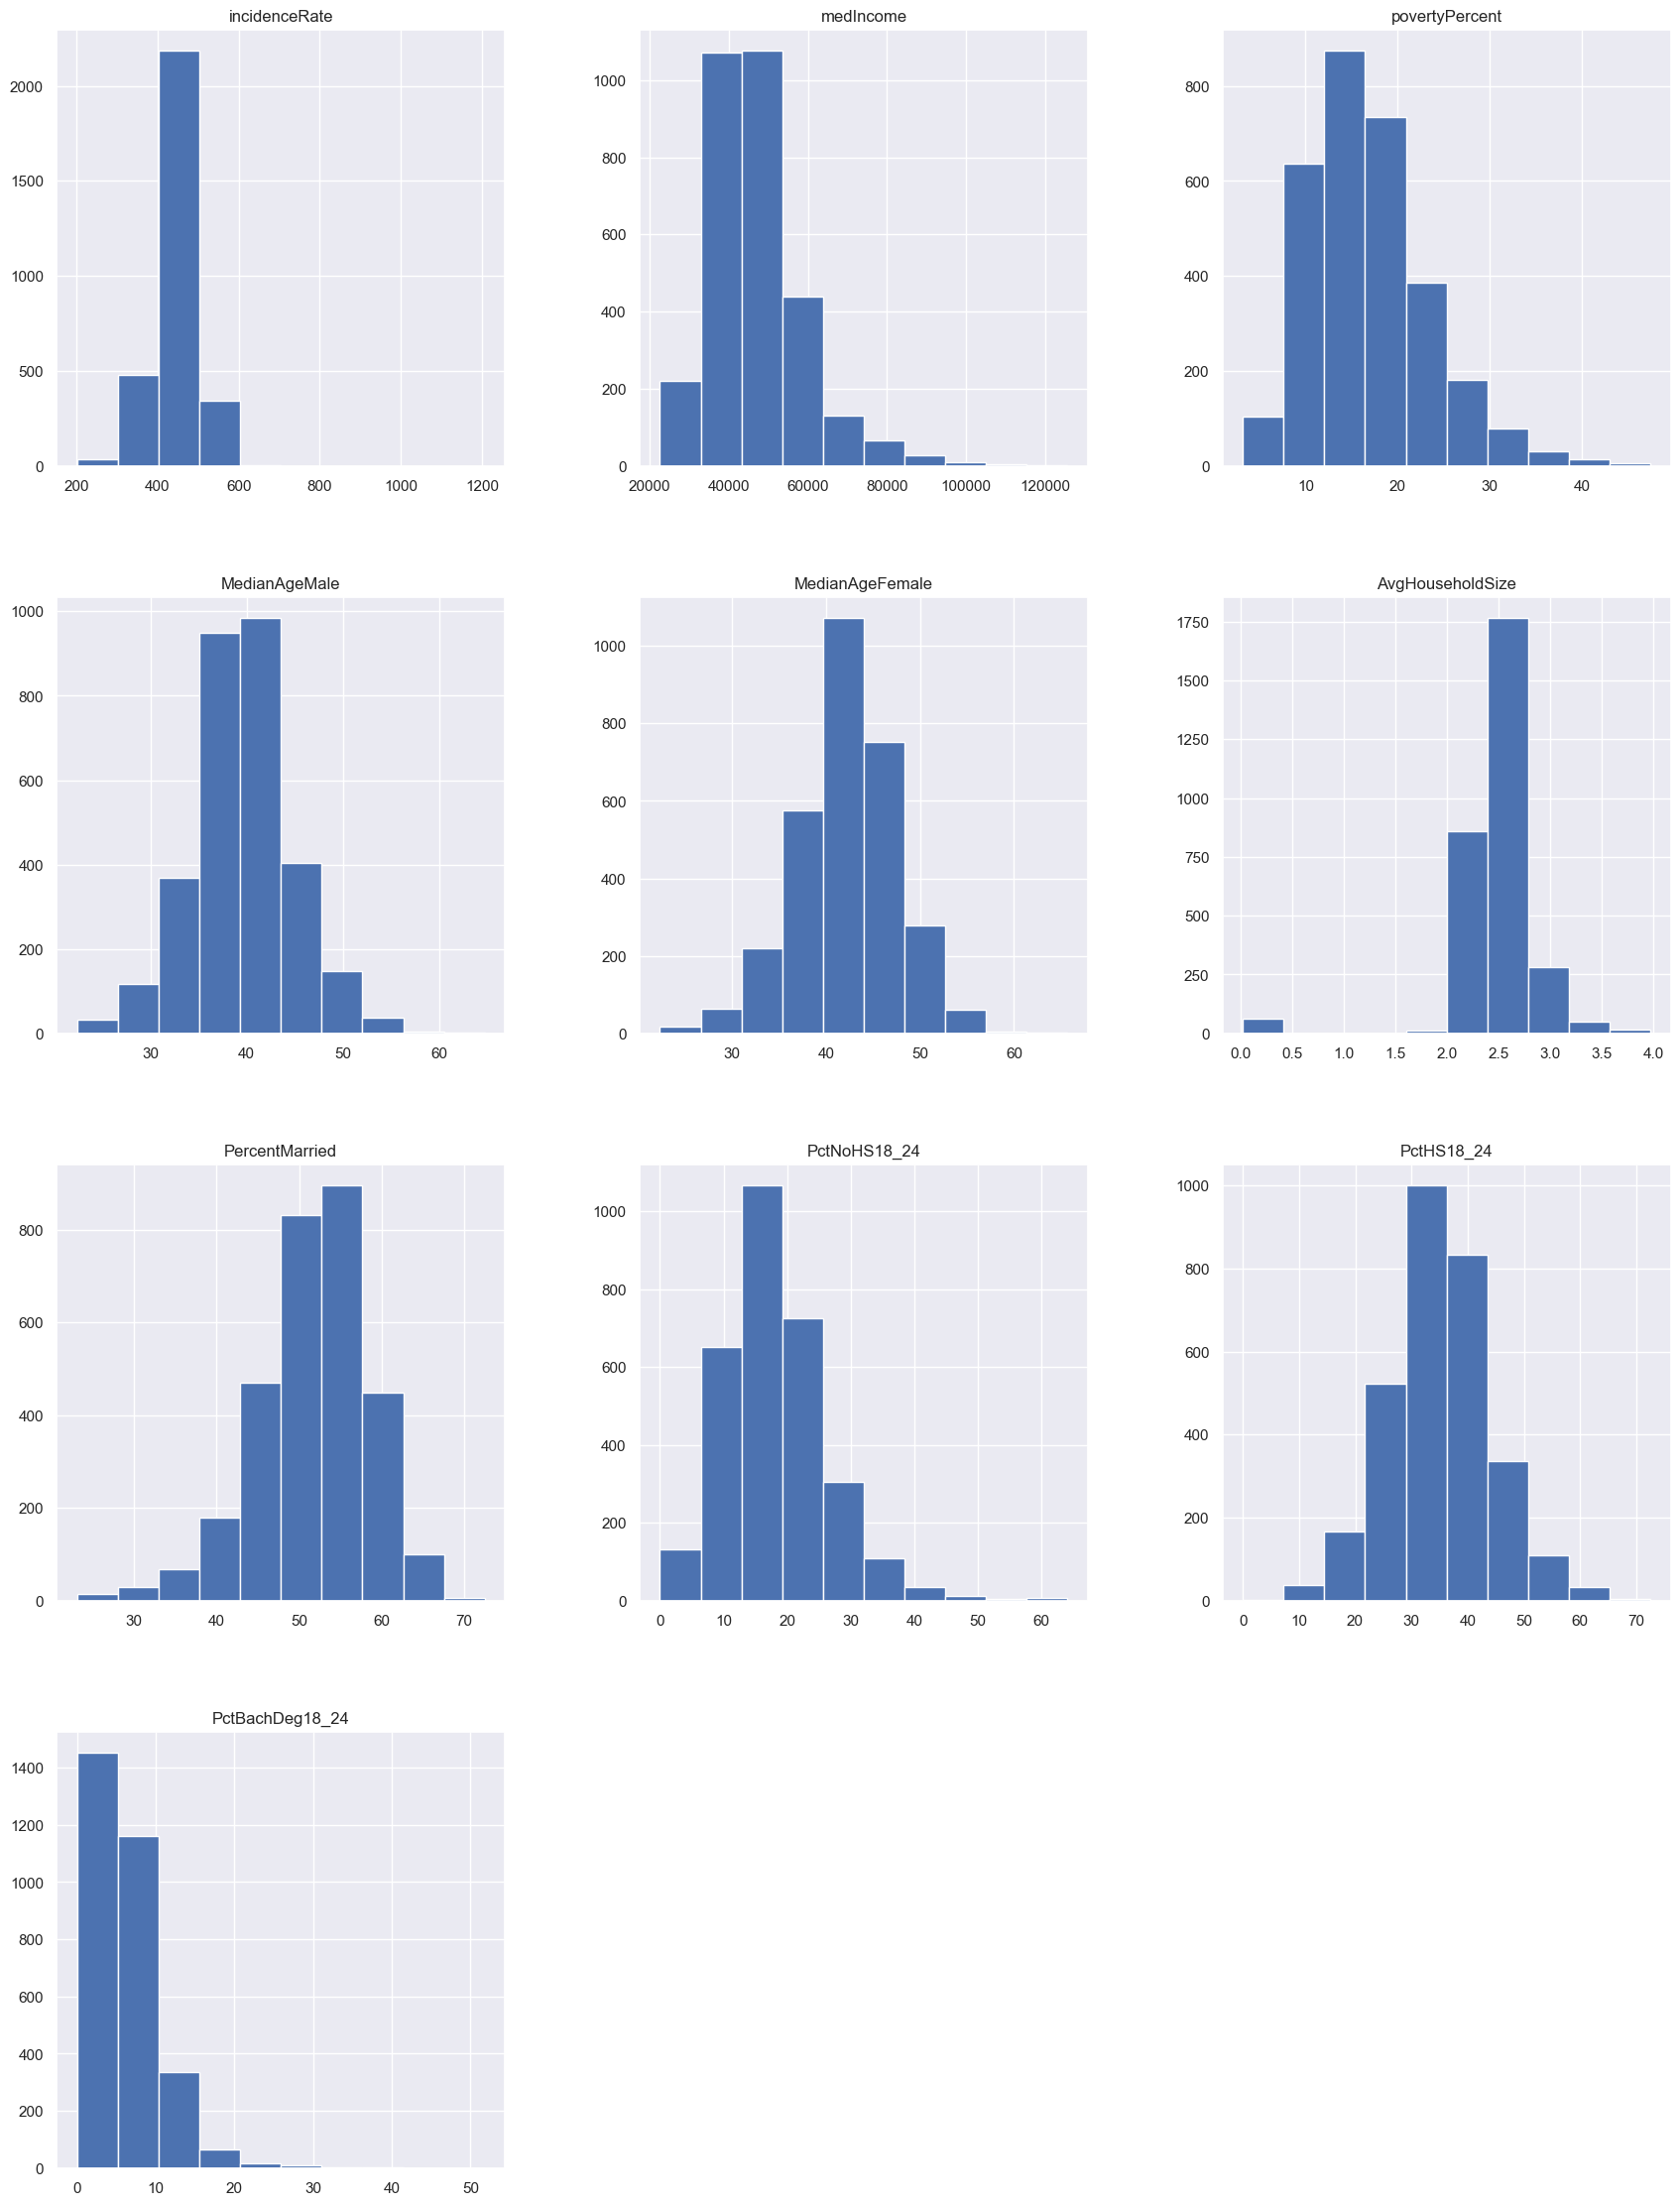

In [28]:
histogram = df.hist(['incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24'], figsize=(21,28))

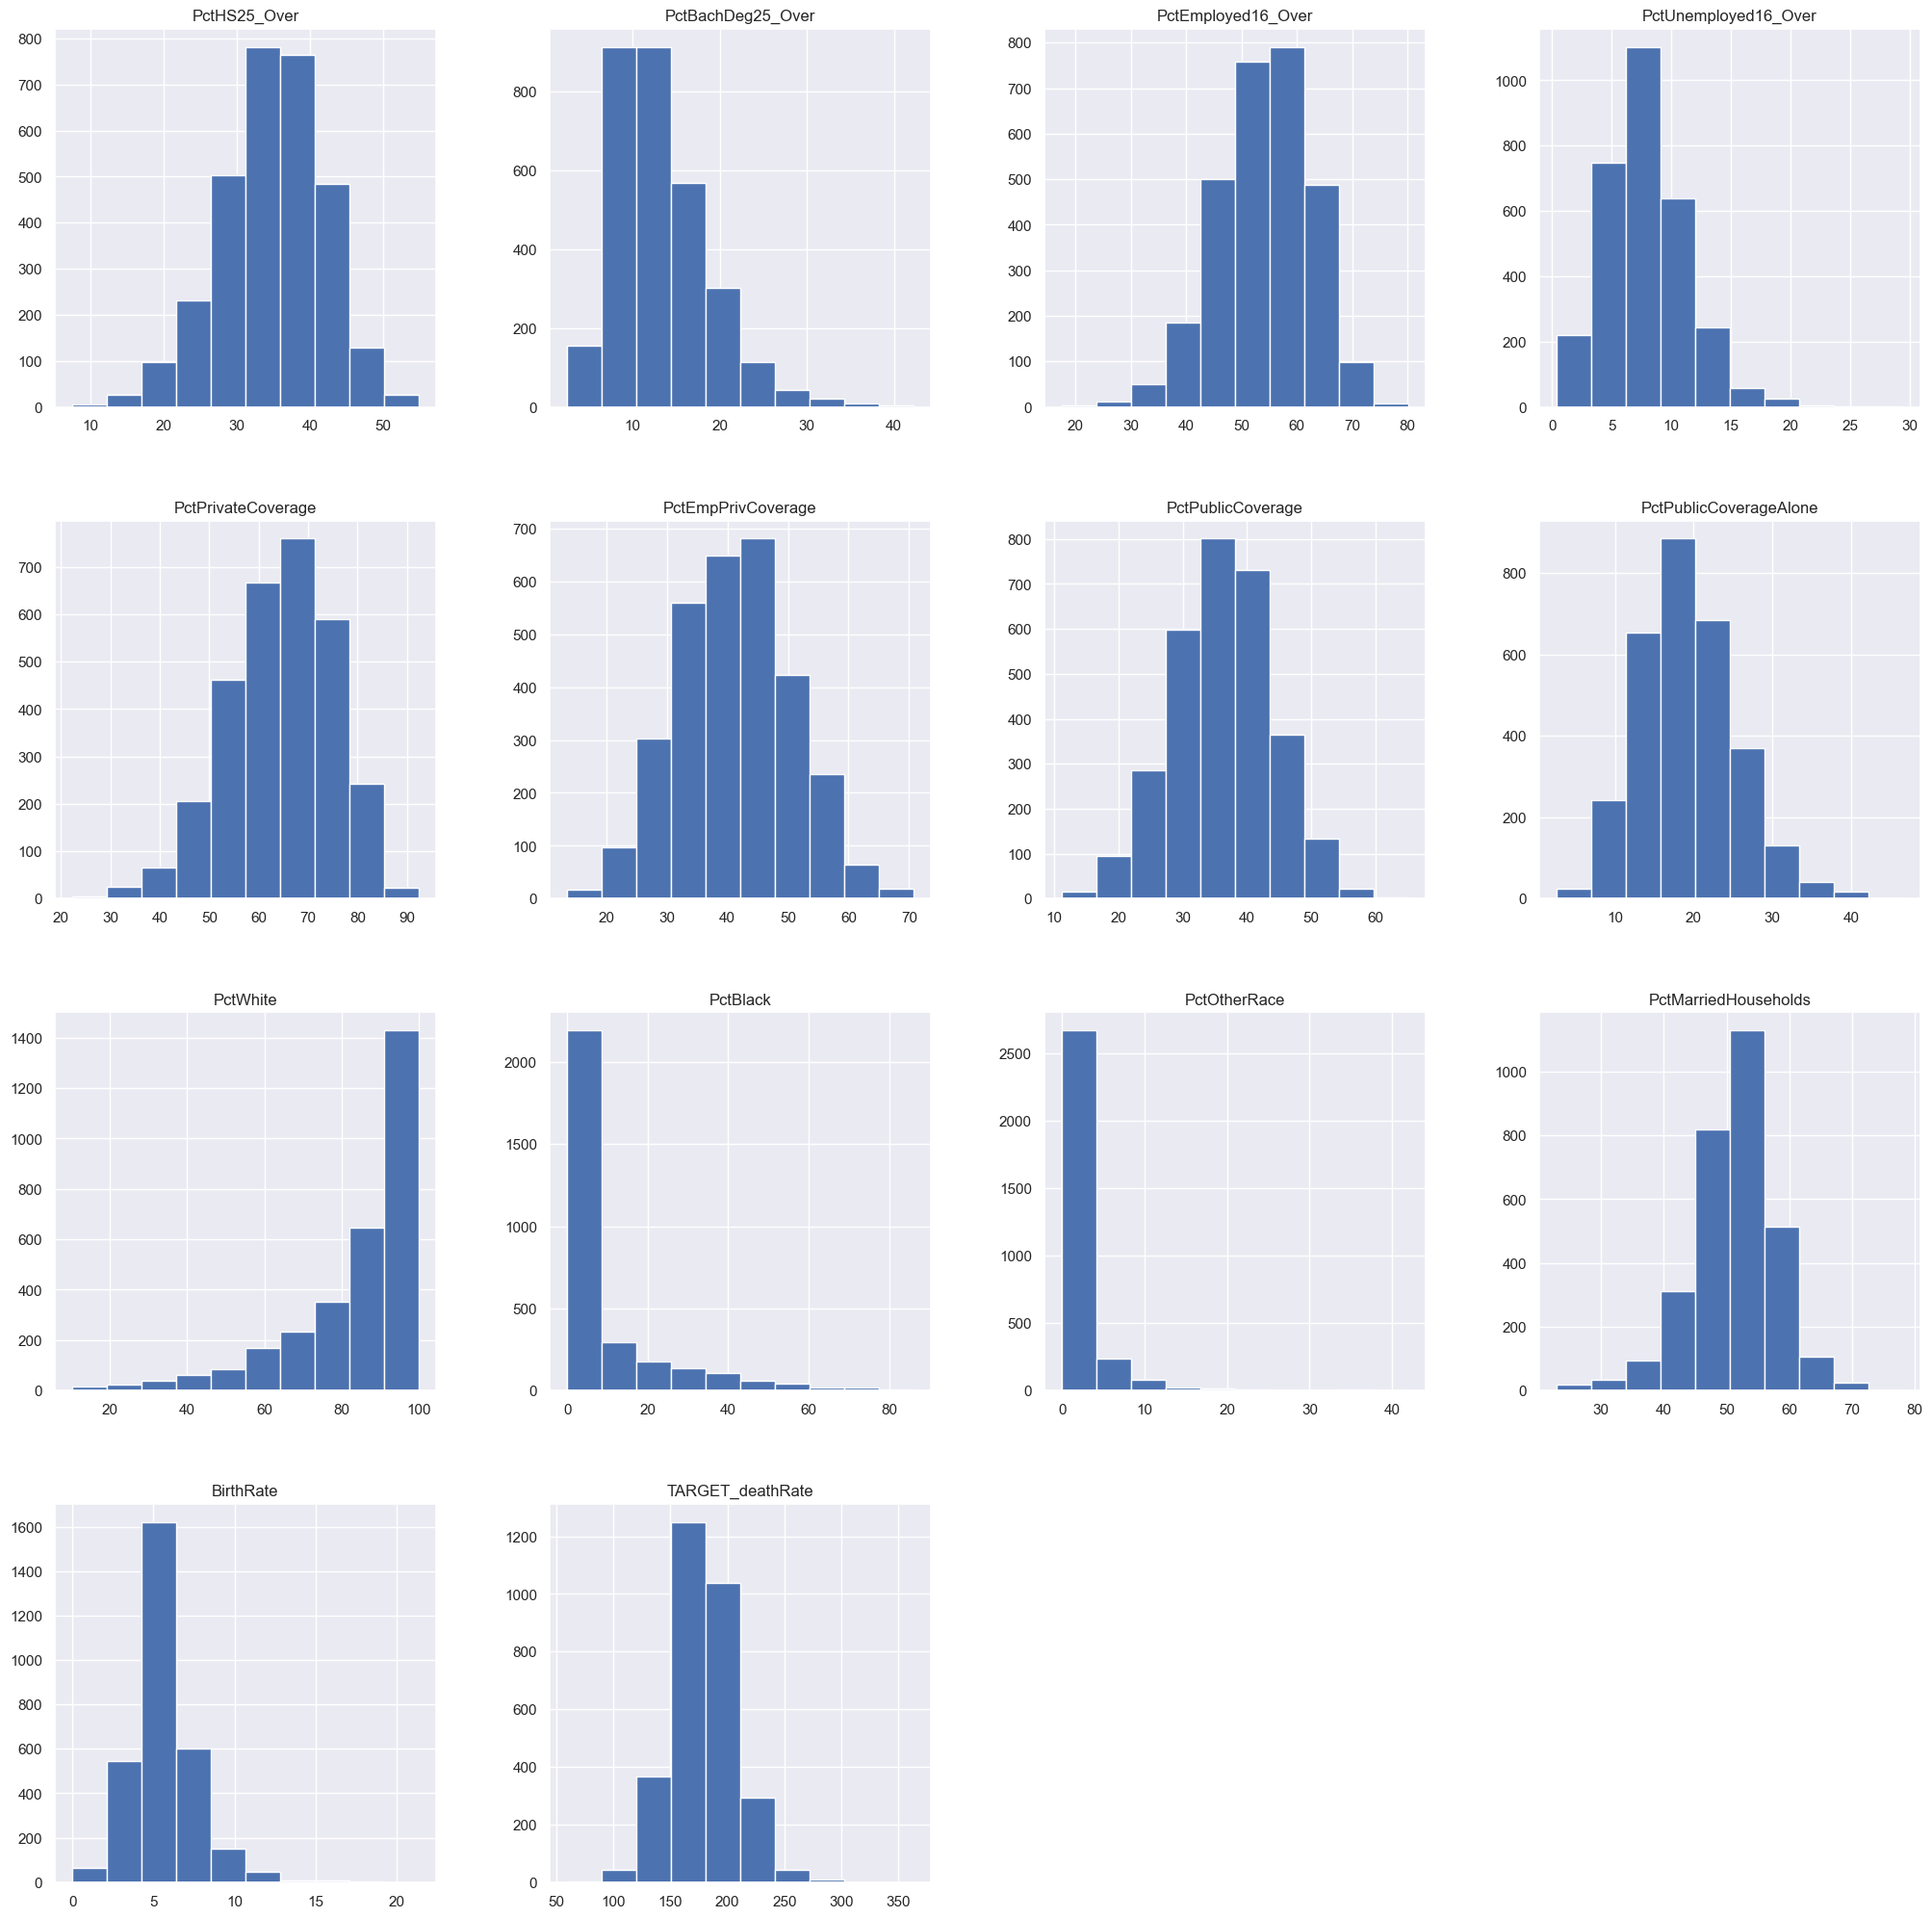

In [30]:
histb = df.hist(['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'], figsize=(25,25))

<AxesSubplot:xlabel='binnedInc'>

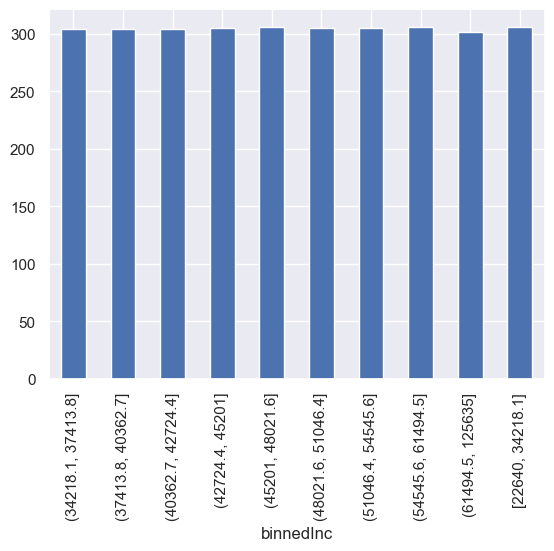

In [31]:
df.groupby('binnedInc').size().plot.bar()

In [33]:
def con(inpData, Cols, Target):
    fig,subplot = plt.subplots(nrows = len(Cols), ncols = 1, figsize = (5,80))
    for ColName, PlotNumber in zip(Cols, range(len(Cols))):
        inpData.plot.scatter(x = ColName, y = Target, ax = subplot[PlotNumber])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

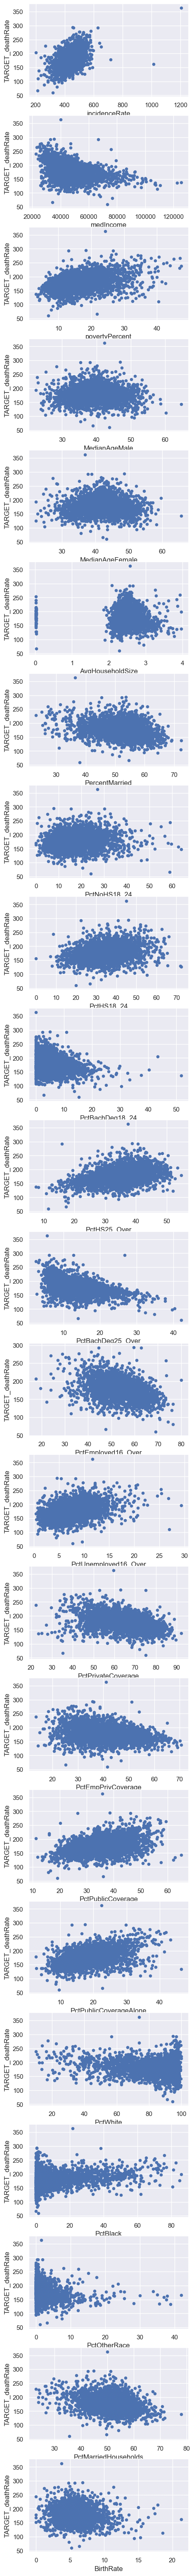

In [35]:
con(inpData=df, Cols=['incidenceRate', 'medIncome', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'], Target='TARGET_deathRate')

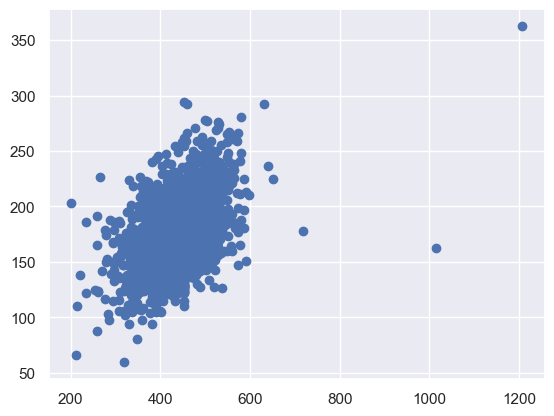

In [36]:
plt.scatter(x=df['incidenceRate'], y=df['TARGET_deathRate'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='incidenceRate', ylabel='TARGET_deathRate'>

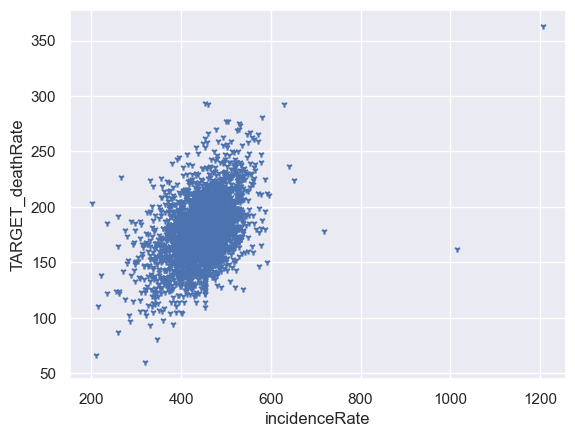

In [41]:
df.plot.scatter(x = 'incidenceRate', y='TARGET_deathRate',marker='1')

In [45]:
relation = df.corr()

In [46]:
np.abs(relation['TARGET_deathRate']).sort_values(ascending=False)

TARGET_deathRate          1.000000
PctBachDeg25_Over         0.485477
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
medIncome                 0.428745
PctEmployed16_Over        0.412046
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctPrivateCoverage        0.386066
PctUnemployed16_Over      0.378412
PctMarriedHouseholds      0.293325
PctBachDeg18_24           0.287817
PctEmpPrivCoverage        0.267399
PercentMarried            0.266820
PctHS18_24                0.261976
PctBlack                  0.257024
PctOtherRace              0.189894
PctAsian                  0.186331
PctWhite                  0.177400
avgAnnCount               0.143532
popEst2015                0.120073
avgDeathsPerYear          0.090715
PctNoHS18_24              0.088463
BirthRate                 0.087407
AvgHouseholdSize          0.036905
studyPerCap               0.022285
MedianAgeMale             0.021929
MedianAgeFemale     

### P-Value for distribution

In [48]:
from scipy.stats import f_oneway
catList = df.groupby(['binnedInc'])['TARGET_deathRate'].apply(list)
ANOVA = f_oneway(*catList)
print(np.round(ANOVA[1],decimals = 10))

0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   incidenceRate           3047 non-null   float64
 3   medIncome               3046 non-null   float64
 4   popEst2015              3047 non-null   int64  
 5   povertyPercent          3047 non-null   float64
 6   studyPerCap             3047 non-null   float64
 7   binnedInc               3047 non-null   object 
 8   MedianAge               3047 non-null   float64
 9   MedianAgeMale           3047 non-null   float64
 10  MedianAgeFemale         3047 non-null   float64
 11  AvgHouseholdSize        3047 non-null   float64
 12  PercentMarried          3047 non-null   float64
 13  PctNoHS18_24            3047 non-null   float64
 14  PctHS18_24              3047 non-null   

In [50]:
MapResult = {'(61494.5, 125635]':10, '(48021.6, 51046.4]':7, '(42724.4, 45201]':5,
       '(51046.4, 54545.6]':8, '(37413.8, 40362.7]':3, '(40362.7, 42724.4]':4,
       '(54545.6, 61494.5]':9, '(34218.1, 37413.8]':2, '[22640, 34218.1]':1,
       '(45201, 48021.6]':6}

In [51]:
df['binnedInc'] = df['binnedInc'].map(MapResult)

In [53]:
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898.0,260131,11.2,499.748204,10,39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127.0,43269,18.6,23.111234,7,33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348.0,21026,14.6,47.560164,7,45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243.0,75882,17.1,342.637253,5,42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955.0,10321,12.5,0.000000,7,48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


In [64]:
df['binnedInc'].unique()

array([10,  7,  5,  8,  3,  4,  9,  2,  1,  6], dtype=int64)

### Missing Values

In [65]:
df.isna().sum()

avgAnnCount               0
avgDeathsPerYear          0
incidenceRate             0
medIncome                 1
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
TARGET_deathRate          0
dtype: int64

### Filling Missing Values

In [128]:
df[ 'medIncome'] =df[ 'medIncome'].fillna(df[ 'medIncome'].median())

In [133]:
df.isna().sum()

avgAnnCount               0
avgDeathsPerYear          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
TARGET_deathRate          0
dtype: int64

In [129]:
x= df.drop(["TARGET_deathRate"], axis=1)
x.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,489.8,61898.0,260131,11.2,499.748204,10,39.3,36.9,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,411.6,48127.0,43269,18.6,23.111234,7,33.0,32.2,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,349.7,49348.0,21026,14.6,47.560164,7,45.0,44.0,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,430.4,44243.0,75882,17.1,342.637253,5,42.8,42.2,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,350.1,49955.0,10321,12.5,0.000000,7,48.3,47.8,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [130]:
y = df["TARGET_deathRate"]
y.head()

0    164.9
1    161.3
2    174.7
3    194.8
4    144.4
Name: TARGET_deathRate, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state= 42)

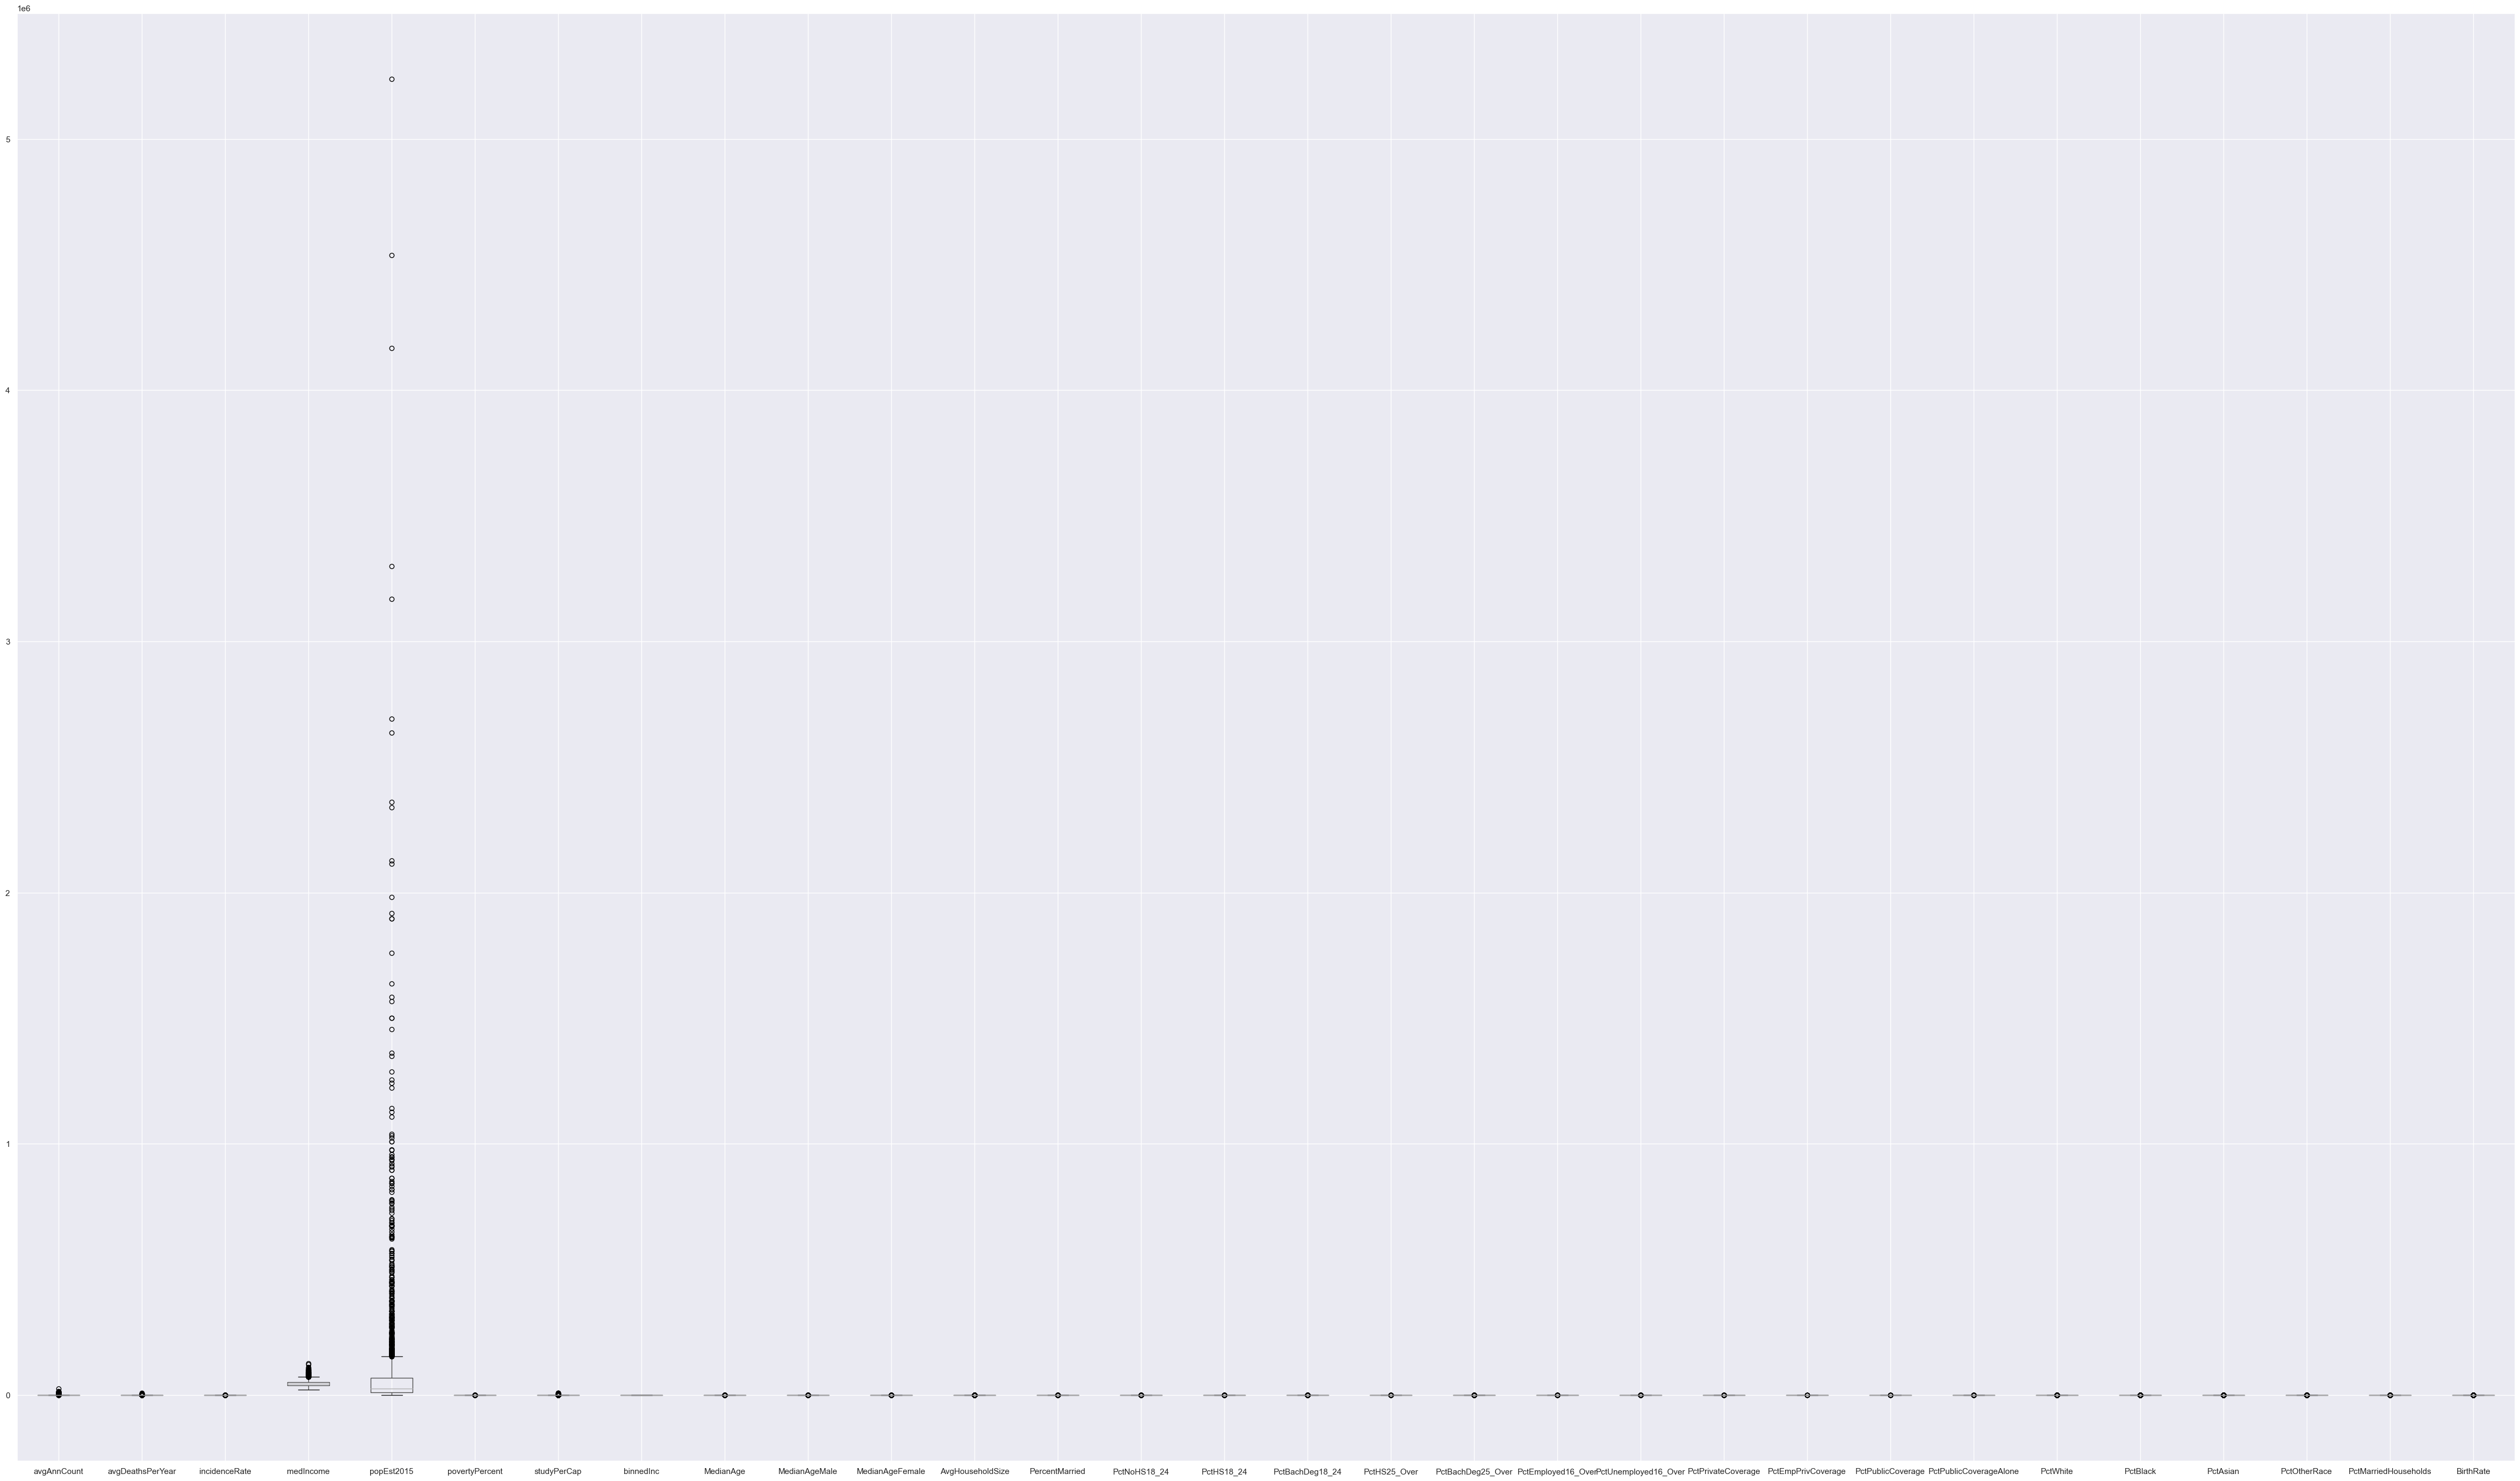

In [109]:
plt.figure(figsize=(70, 35))

x_train.boxplot()
plt.show()

### Features with outliers
1.medIncome
2.popEst2015



In [132]:
outliers_features = ['medIncome', 'popEst2015']
outliers_features

['medIncome', 'popEst2015']

In [77]:
# My custom Transformer to handle the Outliers

from sklearn.base import TransformerMixin
import pandas as pd
pd.options.mode.chained_assignment = None  # To ignore the warning for not returning a copied DataFrame

class HandleOutliers(TransformerMixin):
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):

        from scipy.stats import shapiro

        for col in x.columns : # Looping through all columns within the given DataFrame
            
            # If p-value < 0.05 == Skewed Distribution, else Normal Distribution
            
            if shapiro(X[col]).pvalue < 0.05 :

                # IQR method to handle outliers with Skewed Distribution
                q1 = x[col].quantile(0.25)
                q3 = x[col].quantile(0.75)

                iqr = q3 - q1

                lower_boundary = q1 - 1.5 * q1
                upper_boundary = q3 + 1.5 * q3

                x.loc[x[col] <= lower_boundary, col] = lower_boundary
                x.loc[x[col] >= upper_boundary, col] = upper_boundary

                
            else :

                # 3-Sigma method to handle outliers with Normal Distribution
                lower_boundary = x[col].mean() - 3 * x[col].std()
                upper_boundary = x[col].mean() + 3 * x[col].std()

                x.loc[X[col] <= lower_boundary, col] = lower_boundary
                x.loc[X[col] >= upper_boundary, col] = upper_boundary
                
        return x

In [76]:
outliers = HandleOutliers()

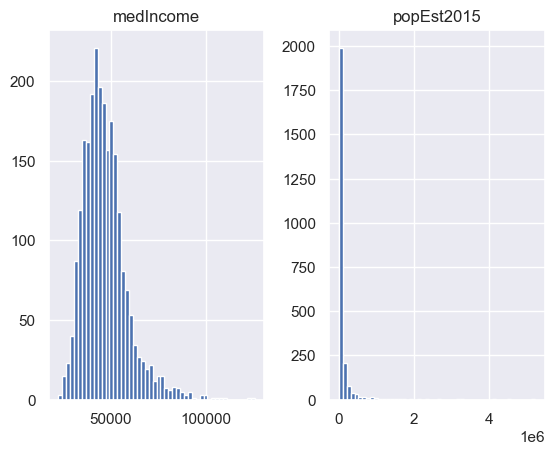

In [111]:
# X_train before handling the outliers
x_train[outliers_features].hist(bins=50)
plt.show()

In [113]:
outliers_df = outliers.fit_transform(x_train[outliers_features])

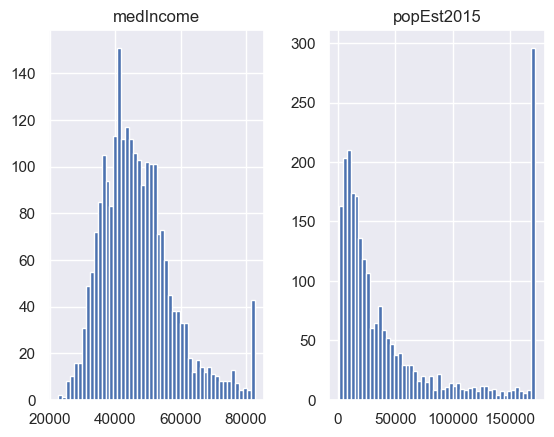

In [114]:
outliers_df.hist(bins=50)
plt.show()

In [115]:
x_train.drop(outliers_features, axis=1, inplace=True)

In [117]:
x_train = pd.concat([x_train, outliers_df], axis=1)

In [118]:
x_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,medIncome,popEst2015
2830,114.0,41,403.8,13.8,0.0,6,40.8,39.8,42.7,2.33,...,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661,47363.0,22702.0
1188,33.0,11,352.0,6.8,0.0,10,38.1,36.9,39.8,2.74,...,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130,77222.0,9899.0
887,254.0,100,429.6,7.5,0.0,10,43.5,42.7,44.1,2.75,...,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462,80650.0,48904.0
1924,75.0,32,407.5,14.6,0.0,5,31.1,30.2,31.6,3.21,...,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469,42839.0,22255.0
2921,110.0,54,502.9,14.1,0.0,6,44.5,43.4,45.4,2.28,...,42.4,23.1,98.174779,0.400996,0.373341,0.013827,54.140334,4.019074,46927.0,14327.0


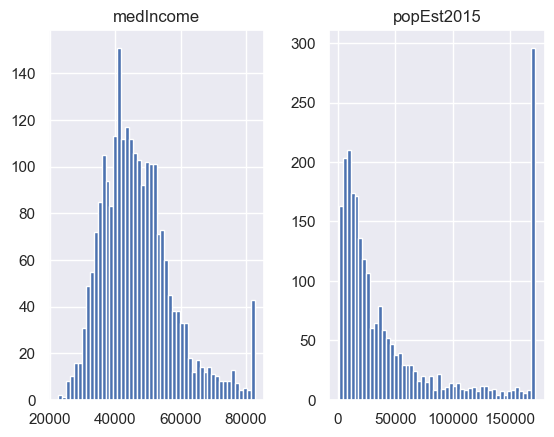

In [120]:
# X_train after handling the outliers
x_train[outliers_features].hist(bins=50)
plt.show()

In [135]:
 Predict = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24',
       'PctBlack', 'binnedInc']

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state= 42)

In [122]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2132, 30)
(2132,)
(915, 30)
(915,)


In [136]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrModel = lr.fit(x_train, y_train)
lrPrediction = lrModel.predict(x_test)
from sklearn.metrics import r2_score
print('R2 value', r2_score(y_train, lrModel.predict(x_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

TestingData = pd.DataFrame(x_test, columns=Predict)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = lrPrediction
TestingData['APE'] = (np.abs(y_test-lrPrediction)/y_test)*100
TestingData

R2 value 0.5333603093425883
Accuracy 91.22838940592464


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,Target,PredictedValue,APE
1582,12.0,477.400000,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5,186.5,189.199616,1.447515
2367,22.3,450.200000,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6,152.5,165.567895,8.569111
2091,23.0,508.700000,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10,174.2,168.583739,3.224030
343,6.8,484.400000,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3,207.6,190.182835,8.389771
2661,11.5,457.700000,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7,192.0,184.599580,3.854385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,9.8,493.100000,20.1,20.9,49044.0,55.6,40.0,32.8,59.8,5.5,47.742354,4.5,42.6,47.7,42.9,18.534353,7,213.2,202.927604,4.818197
2310,3.9,463.900000,23.7,23.2,34512.0,44.1,51.2,38.8,60.5,7.3,46.815575,4.1,43.6,45.2,42.5,37.811634,2,178.0,216.048631,21.375635
1412,18.4,500.100000,20.6,13.0,60387.0,59.9,30.2,34.3,69.1,9.5,45.043064,13.5,50.8,44.7,29.9,12.841095,9,169.0,179.556646,6.246536
2472,16.8,453.549422,13.9,9.6,60869.0,63.9,33.0,31.3,77.2,5.3,54.158463,9.4,51.6,55.8,36.9,1.112620,9,161.6,161.228503,0.229887


### Tweaking Train-Test

In [141]:
def LinearRegressionParams(x_train, y_train, x_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    random_state_list = [42,775,687]
    TrialNo = 0
    for Test_size in test_size_list:
        for Random_state in random_state_list:
            TrialNo+=1
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = Test_size, random_state = Random_state)
            lr = LinearRegression()
            lrModel = lr.fit(x_train, y_train)
            lrPrediction = lrModel.predict(x_test)
            print(TrialNo, 'Random_state', Random_state, '--> Test_size', Test_size, '--> Accuracy',100-(np.mean((np.abs(y_test-lrPrediction)/y_test)))*100)

In [142]:
LinearRegressionParams(x_train, y_train, x_test, y_test)

1 Random_state 42 --> Test_size 0.2 --> Accuracy 91.22838940592464
2 Random_state 775 --> Test_size 0.2 --> Accuracy 91.8636937661372
3 Random_state 687 --> Test_size 0.2 --> Accuracy 91.88770804733298
4 Random_state 42 --> Test_size 0.25 --> Accuracy 91.05526264032008
5 Random_state 775 --> Test_size 0.25 --> Accuracy 91.63970699704454
6 Random_state 687 --> Test_size 0.25 --> Accuracy 91.70549942792621
7 Random_state 42 --> Test_size 0.3 --> Accuracy 90.86650514768651
8 Random_state 775 --> Test_size 0.3 --> Accuracy 91.77584662730283
9 Random_state 687 --> Test_size 0.3 --> Accuracy 91.80040124248055
